In [45]:
import process_db
import h5py
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(1)

rna_embeddings = np.loadtxt('./output/exprs_10xPBMC_rna_features4_embeddings.txt')
atac_embeddings = np.loadtxt('./output/exprs_10xPBMC_atac_features4_embeddings.txt')
print(rna_embeddings.shape)
print(atac_embeddings.shape)
embeddings =  np.concatenate((rna_embeddings, atac_embeddings))
print(embeddings.shape)
embeddings=np.nan_to_num(embeddings)
tsne_results = TSNE(perplexity=30, n_iter = 1000).fit_transform(embeddings)
tsne_results.shape
df = pd.DataFrame()
df['tSNE1'] = tsne_results[:,0]
df['tSNE2'] = tsne_results[:,1]
print("done")


(10000, 64)
(10000, 64)
(20000, 64)


/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


done


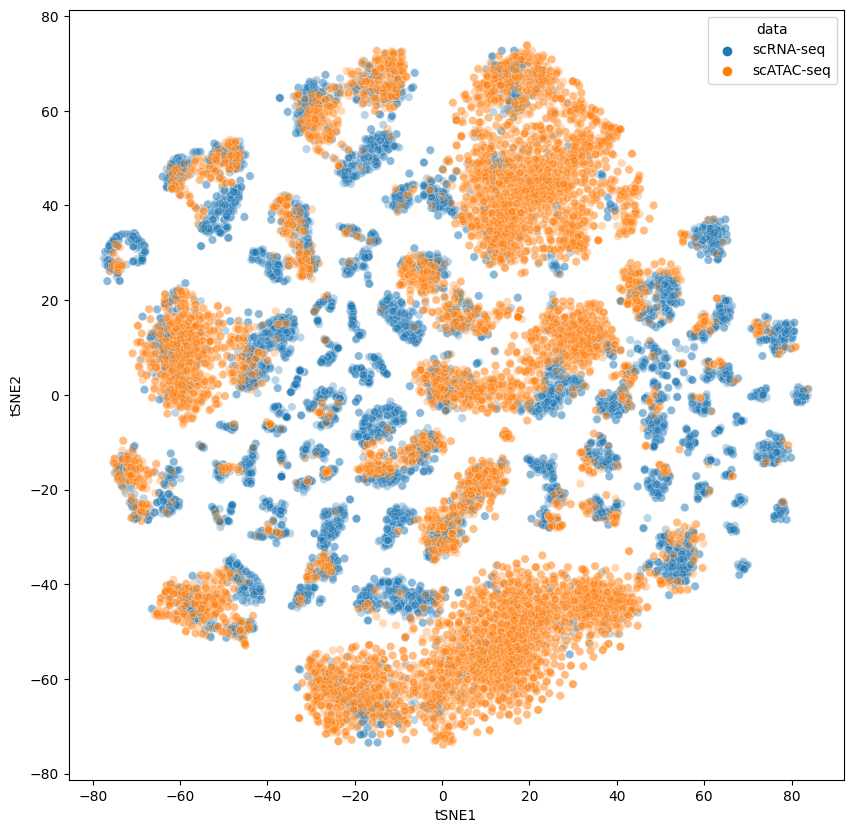

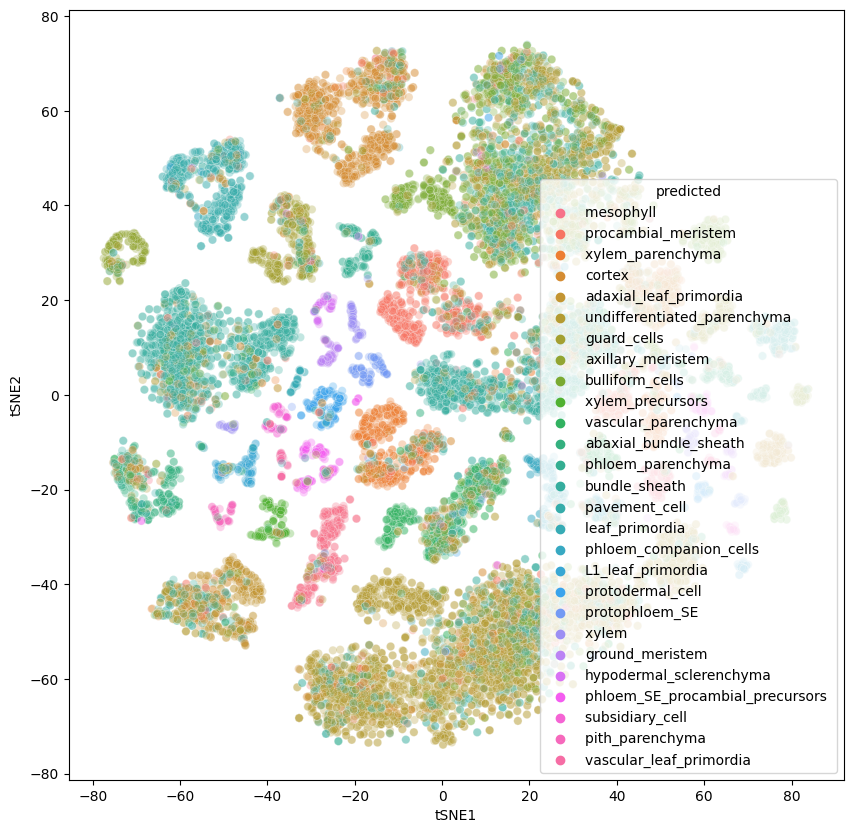

In [46]:
#print(df)
rna_labels = np.loadtxt('./data/maize_leaf_harmony_integrated.v3.subLEIDEN.metadata_fixed2.txt')
atac_predictions = np.loadtxt('./output/exprs_10xPBMC_atac_features3_knn_predictions.txt')
labels =  np.concatenate((rna_labels, atac_predictions))
#print(df.shape)
#print(len(rna_labels))
#print(len(atac_predictions))
#print(len(labels))
label_to_idx = pd.read_csv('./data/label_to_idx.txt', sep = '\t', header = None)
label_to_idx.shape
label_dic = []
for i in range(label_to_idx.shape[0]):
    label_dic = np.append(label_dic, label_to_idx[0][i][:-2])

#print(label_dic)
#print(len(label_dic))
#print(labels)
#print(label_dic[labels.astype(int)[39]])

#print(labels)
#print(len(labels))
#print(label_dic[labels.astype(int)])
#print(len(label_dic[labels.astype(int)]))
#for x in labels.astype(int):
#    print(x)
#    print(label_dic[x])

data_label = np.array(["scRNA-seq", "scATAC-seq"])
df['data'] = np.repeat(data_label, [rna_embeddings.shape[0], atac_embeddings.shape[0]], axis=0)
#print(len(labels.astype(int)))
#print(df['data'])
#print(label_dic[labels.astype(int)])
#print(len(df['data']))
#print(label_dic)
#for item in labels:
#    print(item)
#    print(label_dic[item.astype(int)])
#print(labels[1])
#print(label_dic[labels[1].astype(int)])
df['predicted'] = label_dic[labels.astype(int)-1]



plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("exprs1-4.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("exprs2-4.png")

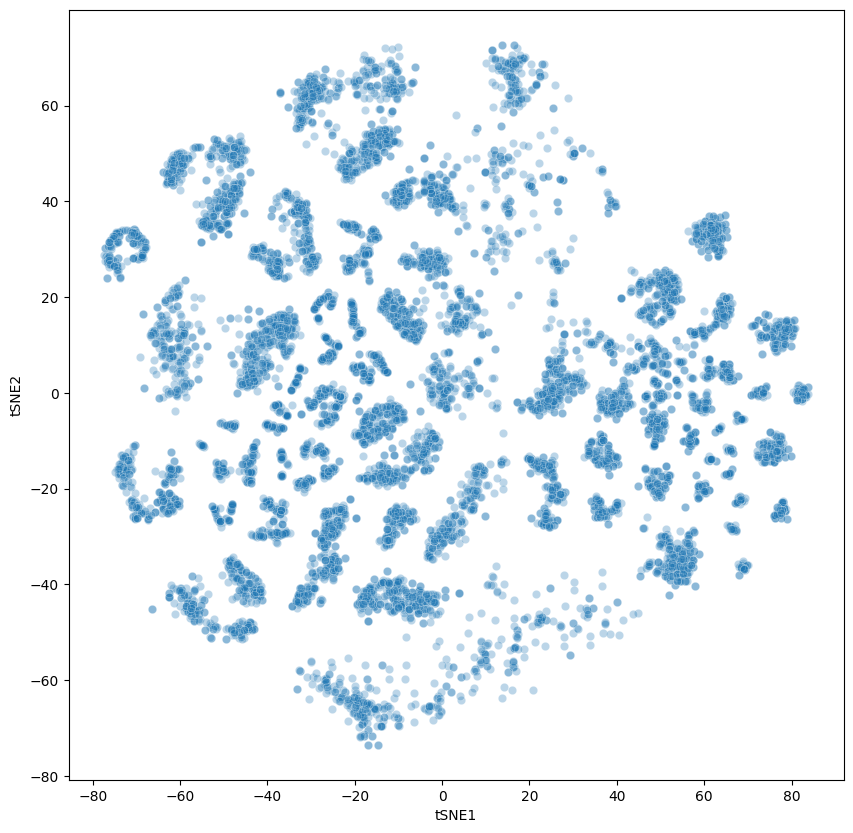

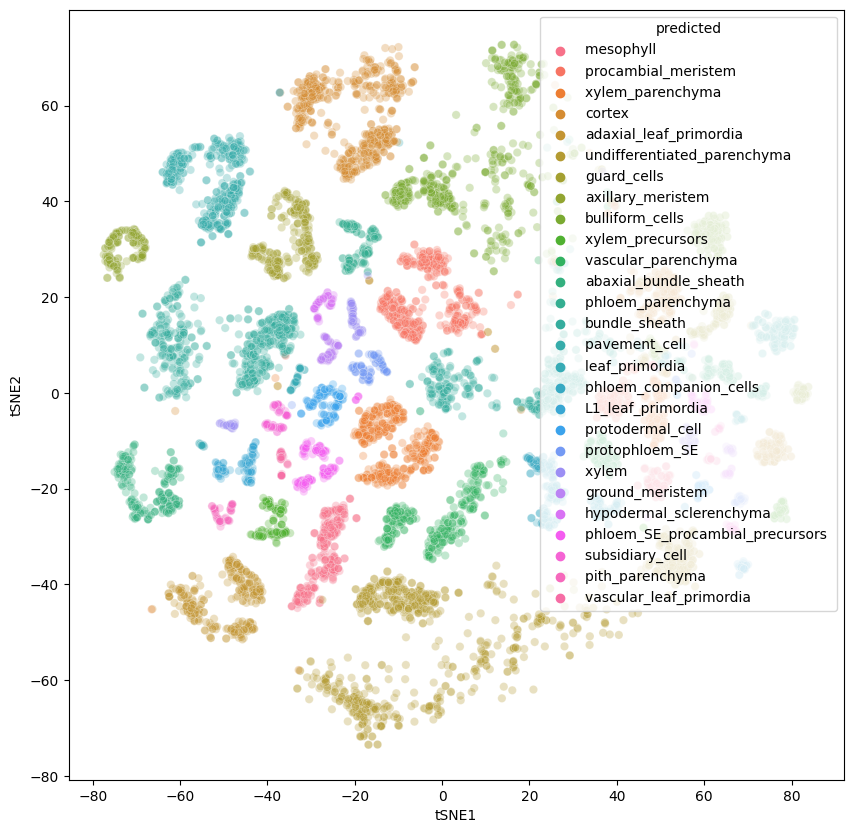

In [47]:
df_modi = df[df.data == "scRNA-seq"]

#df_modi = df_modi[df_modi.tSNE2 > -10]

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    #hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_data_switched_random_new_1.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_predicted_switched_new_random1.png")

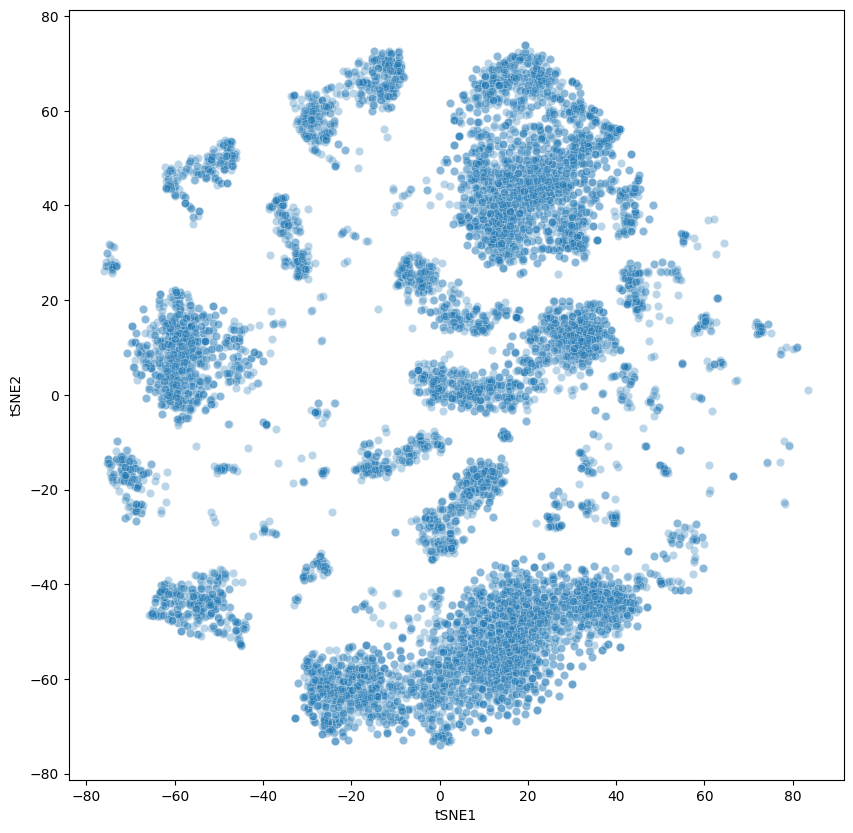

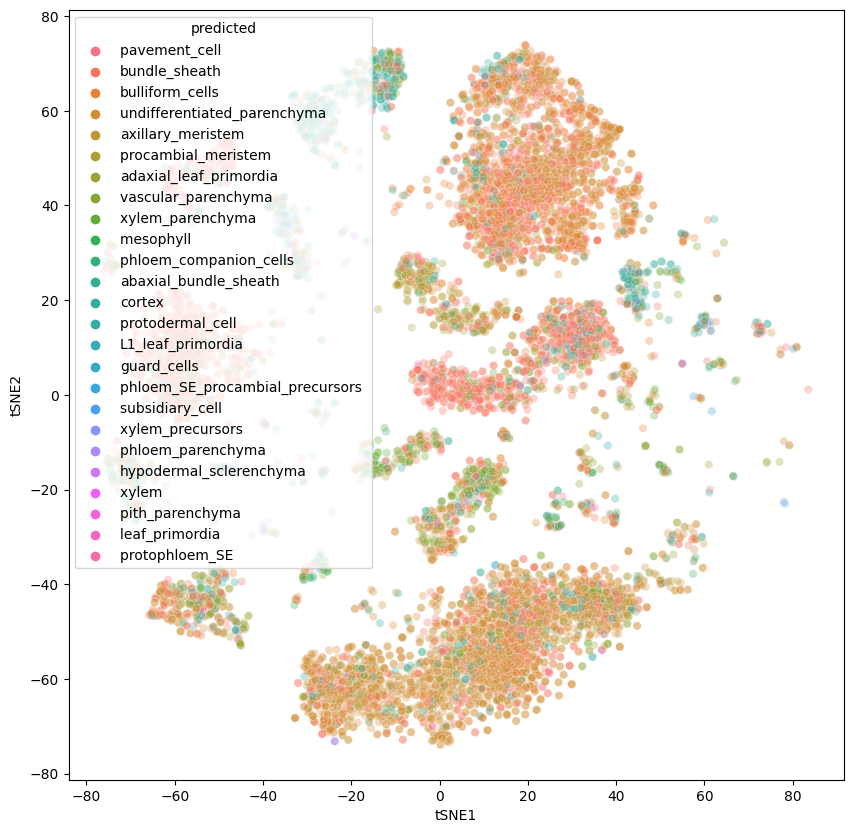

In [48]:
df_modi = df[df.data == "scATAC-seq"]

#df_modi = df_modi[df_modi.tSNE2 > -10]

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    #hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_data_switched_random_new_1.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_predicted_switched_new_random1.png")

In [9]:
df_modi = df[df.data == "scATAC-seq"]
print(df_modi.predicted)

10000                  pavement_cell 
10001                   bundle_sheath
10002                 bulliform_cells
10003    undifferentiated_parenchyma 
10004                   bundle_sheath
                     ...             
19995                   bundle_sheath
19996                     guard_cells
19997                          cortex
19998                   bundle_sheath
19999    undifferentiated_parenchyma 
Name: predicted, Length: 10000, dtype: object


In [29]:
df_modi = df[df.data == "scRNA-seq"]
print(df_modi.predicted)

0                    mesophyll 
1                    mesophyll 
2          procambial_meristem 
3             xylem_parenchyma 
4                        cortex
                 ...           
9995          xylem_parenchyma 
9996             pavement_cell 
9997    phloem_companion_cells 
9998       vascular_parenchyma 
9999                     cortex
Name: predicted, Length: 10000, dtype: object


In [23]:
list_num=[]
with open("ran_gen_x4_num.txt", "r") as r1:
    for lines in r1:
        list_num+=[lines.strip("\n")]
#print(list_num)

list_ATAC_label=[]
with open("data/maize_282.v8.3.scATAC_ALL_CELLs.metadata_reference.txt", "r") as r2:
    count=0
    for lines in r2:
        count+=1
        if count>1:
            list_ATAC_label+=[lines.split("\t")[-3]]

list_ATAC_label_fixed=[]
for item in list_num:
    #print(list_ATAC_label[int(item)])
    list_ATAC_label_fixed+=[list_ATAC_label[int(item)-1]]
    
print(list_ATAC_label_fixed)
#print(list_ATAC_label)
    

['ground_meristem', 'bundle_sheath', 'subsidiary_cells', 'lateral_organ_primordia', 'ground_meristem', 'undifferentiate_parenchyma', 'companion_cell', 'cortex', 'protophloem_SE', 'protophloem_SE', 'companion_cell', 'phloem_parenchyma', 'cortex/parenchyma', 'bundle_sheath', 'rib_meristem_SAM', 'leaf_primordia/cortex', 'phloem_SE_procambial_precursors', 'cortex', 'pavement_cell', 'leaf_primordia/cortex', 'protophloem_SE', 'leaf_primordia/cortex', 'hypodermal_sclerenchyma', 'mesophyll', 'mesophyll', 'guard_cell', 'protophloem_SE', 'bundle_sheath', 'protophloem_SE', 'companion_cell', 'subsidiary_cells', 'lateral_organ_primordia', 'cortex/parenchyma', 'subsidiary_cells', 'guard_cell', 'protophloem_SE', 'protophloem_SE', 'cortex', 'cortex/parenchyma', 'hypodermal_sclerenchyma', 'leaf_primordia/cortex', 'cortex/parenchyma', 'hypodermal_sclerenchyma', 'mesophyll', 'pavement_cell', 'subsidiary_cells', 'early_xylem_parenchyma', 'mesophyll', 'undifferentiate_parenchyma', 'mesophyll', 'pavement_ce

In [25]:
list_predicted=[]
for item in df_modi.predicted:
    list_predicted+=[item]

In [28]:
print(list_predicted)

['pavement_cell ', 'bundle_sheath', 'bulliform_cells', 'undifferentiated_parenchyma ', 'bundle_sheath', 'undifferentiated_parenchyma ', 'bulliform_cells', 'bundle_sheath', 'axillary_meristem', 'undifferentiated_parenchyma ', 'procambial_meristem ', 'undifferentiated_parenchyma ', 'bulliform_cells', 'bundle_sheath', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'bundle_sheath', 'adaxial_leaf_primordia', 'bundle_sheath', 'undifferentiated_parenchyma ', 'procambial_meristem ', 'bulliform_cells', 'undifferentiated_parenchyma ', 'bulliform_cells', 'undifferentiated_parenchyma ', 'vascular_parenchyma ', 'xylem_parenchyma ', 'mesophyll ', 'vascular_parenchyma ', 'bundle_sheath', 'bulliform_cells', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'bundle_sheath', 'undifferentiated_parenchyma ', 'bundle_sheath', 'bundle_sheath', 'procambial_meristem ', 'phloem_companion_cells ', 'bundle_sheath', 'xylem_parenchyma ', 'bundle_sheath', 'undifferentiated_parenchyma 

In [27]:
count=0
for x in range(len(list_predicted)):
    if list_predicted[x]==list_ATAC_label_fixed[x]:
        count+=1
print(count)

235
